In [1]:
%run main.py

../resources/ejemplo.csv


In [2]:
%run main.py

../resources/ejemplo.csv


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import numpy as np
import yaml



In [4]:
def read_csv(filepath, separator, column_names):
    features = pd.read_csv(filepath, sep=separator, names = column_names)
    return features



df = read_csv("../resources/ejemplo.csv", ",", ["age", "workclass", "fnlwgt", "education","education-num","marital-status","occupation","relationship",
                "race","sex","capital-gain","capital-loss", "hours-per-week", "native-country", "target"])



# Descriptive analysis

In [5]:
df.shape



(32561, 15)

**Sample 32561 rows and 15 columns**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
target            32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


**Total columns 15 
6 numeric columns
9 categorical column
Sample: 32561


In [7]:
df.head(30)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


# Data cleansing

We see that there are columns without information

It seems that education and education-num are duplicated columns are correlated.  Lets verify with grouping both and counts.

In [8]:

df2=df[['education','education-num']]
df2.groupby(['education','education-num']).count()


,
education,education-num
10th,6
11th,7
12th,8
1st-4th,2
5th-6th,3
7th-8th,4
9th,5
Assoc-acdm,12
Assoc-voc,11


**Drop education-num **


In [9]:
df.drop("education-num", axis=1, inplace=True)

In [10]:
#replace ? by null
import numpy as np
#replace ? by nan
df.replace(' ?', np.nan, inplace = True)
df.head(30)


,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [11]:

missing_data = df.isnull()
missing_data.head(5)

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")


age
False    32561
Name: age, dtype: int64

workclass
False    30725
True      1836
Name: workclass, dtype: int64

fnlwgt
False    32561
Name: fnlwgt, dtype: int64

education
False    32561
Name: education, dtype: int64

marital-status
False    32561
Name: marital-status, dtype: int64

occupation
False    30718
True      1843
Name: occupation, dtype: int64

relationship
False    32561
Name: relationship, dtype: int64

race
False    32561
Name: race, dtype: int64

sex
False    32561
Name: sex, dtype: int64

capital-gain
False    32561
Name: capital-gain, dtype: int64

capital-loss
False    32561
Name: capital-loss, dtype: int64

hours-per-week
False    32561
Name: hours-per-week, dtype: int64

native-country
False    31978
True       583
Name: native-country, dtype: int64

target
False    32561
Name: target, dtype: int64



We see that  columns  
workclass, occupation, native-country has less than 32561 values.
These columns has nominal values. We could fill by the most frequent value, but the sample data is small and it will introduce **noise**. Therefore we will **remove empty value**


In [12]:
#drop null
df.dropna(how ='any',inplace=True)
df.head(30)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


**Current data shape**

In [13]:
df.shape

(30162, 14)

We are in front of a **Supervised learnin** problem with a **nominal** target value.
The aproach to predict the value should be algorithms like:**Decission Tree, Random Forest, SVM, Naive Bayes..**


In [14]:

df.head(10)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,State-gov,77516,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [15]:
df.describe()

,age,fnlwgt,capital-gain,capital-loss,hours-per-week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,99999.000000,4356.000000,99.000000



Lets transform nominal values to numerical


In [16]:

from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

category_col =['workclass', 'race', 'education','marital-status', 'occupation',
               'relationship', 'sex', 'native-country', 'target'] 
labelEncoder = preprocessing.LabelEncoder()
for col in category_col:
    df[col] = labelEncoder.fit_transform(df[col])
    le_name_mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))
    print(col)
    print(" values :" + str(le_name_mapping) + "\n")
    

workclass
 values :{' Federal-gov': 0, ' Local-gov': 1, ' Private': 2, ' Self-emp-inc': 3, ' Self-emp-not-inc': 4, ' State-gov': 5, ' Without-pay': 6}

race
 values :{' Amer-Indian-Eskimo': 0, ' Asian-Pac-Islander': 1, ' Black': 2, ' Other': 3, ' White': 4}

education
 values :{' 10th': 0, ' 11th': 1, ' 12th': 2, ' 1st-4th': 3, ' 5th-6th': 4, ' 7th-8th': 5, ' 9th': 6, ' Assoc-acdm': 7, ' Assoc-voc': 8, ' Bachelors': 9, ' Doctorate': 10, ' HS-grad': 11, ' Masters': 12, ' Preschool': 13, ' Prof-school': 14, ' Some-college': 15}

marital-status
 values :{' Divorced': 0, ' Married-AF-spouse': 1, ' Married-civ-spouse': 2, ' Married-spouse-absent': 3, ' Never-married': 4, ' Separated': 5, ' Widowed': 6}

occupation
 values :{' Adm-clerical': 0, ' Armed-Forces': 1, ' Craft-repair': 2, ' Exec-managerial': 3, ' Farming-fishing': 4, ' Handlers-cleaners': 5, ' Machine-op-inspct': 6, ' Other-service': 7, ' Priv-house-serv': 8, ' Prof-specialty': 9, ' Protective-serv': 10, ' Sales': 11, ' Tech-supp

In [17]:
df.head(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,5,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,2,9,5,2,0,0,0,40,4,0


In [18]:
df.head(5)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,target
0,39,5,77516,9,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,2,3,0,4,1,0,0,13,38,0
2,38,2,215646,11,0,5,1,4,1,0,0,40,38,0
3,53,2,234721,1,2,5,0,2,1,0,0,40,38,0
4,28,2,338409,9,2,9,5,2,0,0,0,40,4,0


In [19]:
df.shape

(30162, 14)

## Decission Tree

**Entropy**	
A decision tree is built top-down from a root node and involves partitioning the data into subsets that contain instances with similar values (homogenous). ID3 algorithm uses entropy to calculate the homogeneity of a sample. If the sample is completely homogeneous the entropy is zero and if the sample is an equally divided it has entropy of one.		
 

To build a decision tree, we need to calculate two types of entropy using frequency tables as follows:		
a) Entropy using the frequency table of one attribute:	

b) Entropy using the frequency table of two attributes:		


 		
**Information Gain**

The information gain is based on the decrease in entropy after a dataset is split on an attribute. Constructing a decision tree is all about finding attribute that returns the highest information gain (i.e., the most homogeneous branches).	

Step 1: Calculate entropy of the target. 		


Step 2: The dataset is then split on the different attributes. The entropy for each branch is calculated. Then it is added proportionally, to get total entropy for the split. The resulting entropy is subtracted from the entropy before the split. The result is the Information Gain, or decrease in entropy. 		


Step 3: Choose attribute with the largest information gain as the decision node, divide the dataset by its branches and repeat the same process on every branch.		


Step 4a: A branch with entropy of 0 is a leaf node.		
Step 4b: A branch with entropy more than 0 needs further splitting.		
Step 5: The ID3 algorithm is run recursively on the non-leaf branches, until all data is classified.		
 		

Decision Tree to Decision Rules
A decision tree can easily be transformed to a set of rules by mapping from the root node to the leaf nodes one by one.		


	


https://www.saedsayad.com/decision_tree.htm



In [20]:

X = df.values[:,0:13]
Y = df.values[:,13]

x_train, x_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 100)


In [21]:
#Lot of people <=50k (0)
df.groupby("target").size()

target
0    22654
1     7508
dtype: int64

In [22]:
list(y_train)
df_y_train = pd.DataFrame({'a':list(y_train)})
df_y_train
df_y_train['a'].value_counts()


0    15903
1     5210
Name: a, dtype: int64

In [23]:
list(y_test)
df_y_test = pd.DataFrame({'a':list(y_test)})
df_y_test
df_y_test['a'].value_counts()

0    6751
1    2298
Name: a, dtype: int64

**Warning** Target value is biased, It means that the decision tree should be balanced

Read the doc: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html


**class_weight** : dict, list of dicts, “balanced” or None, default=None
Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.

The *“balanced”* mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))


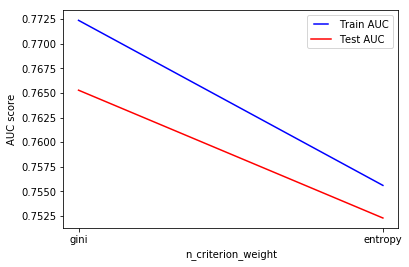

In [24]:
#Desicion Tree with Gini Index unbalanced
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

n_criterion= ["gini","entropy"]

n_criterion_weight=[]

test_results_roc = []
train_results_roc = []
accuracy_result = []

precission_result = []

for criterio in n_criterion:
   
       dt_clf_gini = DecisionTreeClassifier(criterion = criterio,
                                   max_depth=2, min_samples_leaf=5,class_weight= "balanced")
       dt_clf_gini.fit(x_train, y_train)
       train_pred = dt_clf_gini.predict(x_train)
       false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
       roc_auc = auc(false_positive_rate, true_positive_rate)
       train_results_roc.append(roc_auc)
       y_pred = dt_clf_gini.predict(x_test)
       false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
       roc_auc = auc(false_positive_rate, true_positive_rate)
       test_results_roc.append(roc_auc)
       accuracy_result.append( accuracy_score(y_test,y_pred)*100)
       precission_result.append(metrics.classification_report(y_test,y_pred))


        
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(n_criterion, train_results_roc, 'b', label="Train AUC")
line2, = plt.plot(n_criterion, test_results_roc, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("n_criterion_weight")
plt.show()

The comparation among Gini and Entropy shows that gini fits better than entropy

In [25]:
print("ROC AUC:" , train_results_roc[0])
print("ROC auc_test", test_results_roc[0])

ROC AUC: 0.7723744708050715
ROC auc_test 0.7652794306075147


# Lets investigate tree depths


In [26]:


n_criterion_weight=[]

test_results_roc = []
train_results_roc = []
accuracy_result = []

precission_result = []
trees_depths= [1,2,3,4,5,6,7,8,9,10]

for tree_depth in trees_depths:
   
       dt_clf_gini = DecisionTreeClassifier(criterion = 'gini',
                                   max_depth=tree_depth, min_samples_leaf=5,class_weight= "balanced")
       dt_clf_gini.fit(x_train, y_train)
       train_pred = dt_clf_gini.predict(x_train)
       false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
       roc_auc = auc(false_positive_rate, true_positive_rate)
       train_results_roc.append(roc_auc)
       y_pred = dt_clf_gini.predict(x_test)
       false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
       roc_auc = auc(false_positive_rate, true_positive_rate)
       test_results_roc.append(roc_auc)
       accuracy_result.append( accuracy_score(y_test,y_pred)*100)
       precission_result.append(metrics.classification_report(y_test,y_pred))



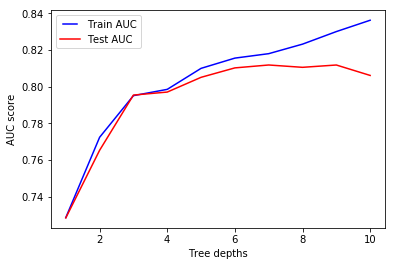

In [27]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(trees_depths, train_results_roc, 'b', label="Train AUC")
line2, = plt.plot(trees_depths, test_results_roc, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("Tree depths")
plt.show()

The best choice here is depth 7, after that the model underfit

In [28]:
print("ROC AUC:" , train_results_roc[6])
print("ROC auc_test", test_results_roc[6])

ROC AUC: 0.8180194878668821
ROC auc_test 0.8118397248694356


# Lets investigate the min samples leaf

In [29]:
test_results_roc = []
train_results_roc = []
accuracy_result = []

precission_result = []
min_samples= [1,2,3,4,5,6,7,8,9,10,11,12]

for min_sample in min_samples:
   
       dt_clf_gini = DecisionTreeClassifier(criterion = 'gini',  max_depth=2,
                                   min_samples_leaf=min_sample,class_weight= "balanced")
       dt_clf_gini.fit(x_train, y_train)
       train_pred = dt_clf_gini.predict(x_train)
       false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
       roc_auc = auc(false_positive_rate, true_positive_rate)
       train_results_roc.append(roc_auc)
       y_pred = dt_clf_gini.predict(x_test)
       false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
       roc_auc = auc(false_positive_rate, true_positive_rate)
       test_results_roc.append(roc_auc)
       accuracy_result.append( accuracy_score(y_test,y_pred)*100)
       precission_result.append(metrics.classification_report(y_test,y_pred))



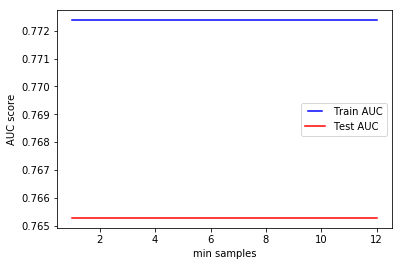

In [30]:
from matplotlib.legend_handler import HandlerLine2D
line1, = plt.plot(min_samples, train_results_roc, 'b', label="Train AUC")
line2, = plt.plot(min_samples, test_results_roc, 'r', label="Test AUC")
plt.legend(handler_map={line1: HandlerLine2D(numpoints=2)})
plt.ylabel("AUC score")
plt.xlabel("min samples")
plt.show()

The roc is constant with the min samples. This implies that we left the min samples to 5


# The choice:
If we compare the train roc among the models, the best choice is 

- criterio gini,
- max_depthn =7
- min_samples = 5


In [34]:
from sklearn.model_selection import cross_val_score

dt_clf_gini = DecisionTreeClassifier(criterion = 'gini',  max_depth=7,
                                   min_samples_leaf=5,class_weight= "balanced")
dt_clf_gini.fit(x_train, y_train)
    
train_pred = dt_clf_gini.predict(x_train)
 
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, train_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)

y_pred = dt_clf_gini.predict(x_test)

false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc_test = auc(false_positive_rate, true_positive_rate)


print("ROC AUC:" , roc_auc)
print("ROC auc_test", roc_auc_test )
print("Accuracy :", accuracy_score(y_test,y_pred)*100)
print("Precision:",classification_report(y_test,y_pred))

scores = cross_val_score(dt_clf_gini, x_train,       
    y_train, cv=3, scoring='roc_auc') 

print("Mean: " + str(np.mean(scores)))
print("Std: " + str(np.std(scores)))



ROC AUC: 0.8180194878668821
ROC auc_test 0.8118397248694356
Accuracy : 79.99778981102884
Precision:               precision    recall  f1-score   support

           0       0.93      0.79      0.85      6751
           1       0.57      0.84      0.68      2298

   micro avg       0.80      0.80      0.80      9049
   macro avg       0.75      0.81      0.77      9049
weighted avg       0.84      0.80      0.81      9049

Mean: 0.8850162840801715
Std: 0.004377605070599302
